In [ ]:
pip install turicreate

     |████████████████████████████████| 92.0 MB 7.1 kB/s 
     |████████████████████████████████| 3.6 MB 43.5 MB/s 
     |████████████████████████████████| 86.4 MB 18 kB/s 
     |████████████████████████████████| 3.5 MB 41.3 MB/s 
     |████████████████████████████████| 322 kB 55.1 MB/s 
     |████████████████████████████████| 18.3 MB 72 kB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 449 kB 66.3 MB/s 
     |████████████████████████████████| 3.8 MB 77.5 MB/s 
     |████████████████████████████████| 2.9 MB 43.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=5e746549f795ae62c57f9befb20a1befc9ad1088530d4f4b92f5373df76d8a9b
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=816f815d7f3

In [ ]:
import turicreate as tc

In [ ]:
import numpy as np
#import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
test_image=tc.SFrame('/content/drive/MyDrive/image_test_data')

In [ ]:
train_image=tc.SFrame('/content/drive/MyDrive/image_train_data')

In [ ]:
test_image

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."


In [ ]:
train_image

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


## Train the classifier on the raw image pixel

In [ ]:
raw_pixel_model=tc.logistic_classifier.create(train_image,target='label',features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.026771  | 1.461862     | 0.283613          | 0.257426            |

| 1         | 10       | 2.275541  | 2.060682     | 0.397059          | 0.475248            |

| 2         | 11       | 2.275541  | 2.305118     | 0.349790          | 0.306931            |

| 3         | 13       | 0.877273  | 2.651120     | 0.439076          | 0.445545            |

| 4         | 14       | 1.000000  | 2.894706     | 0.451155          | 0.455446            |

| 9         | 23       | 1.000000  | 4.474327     | 0.526786          | 0.495050            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

## make prediction on the simple model using rawpixels

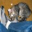

In [ ]:
test_image[0]['image']



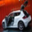

In [ ]:
test_image[1]['image']

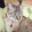

In [ ]:
test_image[2]['image']

In [ ]:
test_image[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [ ]:
raw_pixel_model.predict(test_image[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [ ]:
raw_pixel_model.evaluate(test_image)

{'accuracy': 0.4815, 'auc': 0.7293637916666669, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  117  |
 |  automobile  |       cat       |  140  |
 |     cat      |       bird      |  190  |
 |     dog      |       bird      |  250  |
 |     cat      |    automobile   |  179  |
 |     cat      |       cat       |  318  |
 |     dog      |       dog       |  423  |
 |     cat      |       dog       |  313  |
 |     bird     |       cat       |  141  |
 |  automobile  |       bird      |  108  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.47654284417204706, 'log_loss': 1.1938582449307256, 'precision': 0

### Improving the model using deep features

In [ ]:
deep_feature_model=tc.logistic_classifier.create(train_image,target='label',features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.487944     | 0.760504          | 0.722772            |

| 1         | 7        | 0.125000  | 1.343930     | 0.770483          | 0.712871            |

| 2         | 14       | 2.600941  | 2.666687     | 0.786765          | 0.683168            |

| 3         | 15       | 2.600941  | 3.047478     | 0.052521          | 0.118812            |

| 4         | 19       | 0.459907  | 3.899309     | 0.852941          | 0.752475            |

| 9         | 25       | 1.000000  | 5.984382     | 0.957983          | 0.782178            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
deep_feature_model.predict(test_image[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [ ]:
deep_feature_model.evaluate(test_image)

{'accuracy': 0.785, 'auc': 0.9388435416666666, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       cat       |  206  |
 |     bird     |       bird      |  788  |
 |  automobile  |       bird      |   13  |
 |  automobile  |    automobile   |  967  |
 |     bird     |    automobile   |   16  |
 |     cat      |       cat       |  653  |
 |     bird     |       cat       |  147  |
 |     cat      |       dog       |  247  |
 |     dog      |       dog       |  732  |
 |     dog      |    automobile   |   10  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7854714245821445, 'log_loss': 0.665586316294281, 'precision': 0.78

## Predicting the nearest neighbour 

In [ ]:
knn_model=tc.nearest_neighbors.create(train_image,features=['deep_features'],label='id')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

## Use image retrival model

In [ ]:
train_image

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


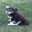

In [ ]:
cat=train_image[3]['image']
cat